In [22]:
import torch
from torch import nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from torchviz import make_dot
import matplotlib.pyplot as plt

## **Pojęcia**
- **Sieć neuronowa** - złożona funkcja matematyczna, która przetwarza dane wejściowe w dane wyjściowe $ŷ = f^\prime(x;⦦;\theta)$, gdzie $x$ to dane wejściowe, $ŷ$ to dane wyjściowe, a $f^\prime$ to funkcja przetwarzania danych, $⦦$ to aktywacja, a $θ$ to parametry.
- **Uczenie głębokie** - jest to proces uczenia się przez sieć neuronową, gdzie sieć może mieć wiele warstw ukrytych.
- **Parametry** - są to wagi w modelu.
- **Bias** - jest to wartość dodawana do sumy ważonej wejścia.
- **Funkcja aktywacji** - jest to funkcja, która przetwarza sumę ważoną wejścia i dodaje do niej bias.
- **Macierz wag** - jest to macierz, która przechowuje wagi między neuronami.

### **Zależność pomiędzy grafem a macierzą**
![Prosta sieć z 2 warstwami ukrytymi](media/Graph2Matrix.png)
![matrix](media/matrix.png)

### **Prosta sieć z 2 warstwami ukrytymi**
### **Uczenie głębokie**
![Prosta sieć z 2 warstwami ukrytymi](media/Neural%20NetworkB.png)

In [23]:
# tensor
# scalar
# wektor
# macierz


#### **XOR; albo, albo; alternatywa wykluczająca**
| $p$ | $q$ | $p \oplus q$ |
|-----|-----|-------------|
| True | True | False |
| True | False | True |
| False | True | True |
| False | False | False |

#### **LUB; alternatywa**
| $p$ | $q$ | $p \vee q$ |
|-----|-----|-----------|
| True | True | True |
| True | False | True |
| False | True | True |
| False | False | False |

#### **I, koniunkcja**
| $p$ | $q$ | $p \wedge q$ |
|-----|-----|-------------|
| True | True | True |
| True | False | False |
| False | True | False |
| False | False | False |

### Wielowarstwowy perceptron (MLP - multi-layer perceptron)

In [24]:
# Zdefiniowanie modelu
class MLP(nn.Module):
    
    def __init__(self):
        super(MLP, self).__init__()
        self.W1 = nn.Linear(2, 4) # 2 wejścia, 4 neurony w warstwie ukrytej W1
        self.W2 = nn.Linear(4, 2) # 4 neurony w warstwie ukrytej W1, 2 neurony w warstwie ukrytej W2
        self.W3 = nn.Linear(2, 1) # 2 neurony w warstwie ukrytej W2, 1 wyjście
        

    def forward(self, x):
        x = F.relu(self.W1(x)) # relu 
        x = F.relu(self.W2(x)) # relu
        x = F.sigmoid(self.W3(x)) # sigmoid
        return x

In [25]:
# XOR
xor_model = MLP()
print(xor_model)

X = torch.tensor([[0,0], [0,1], [1,0], [1,1]], dtype=torch.float32) # wejścia/ dane treningowe
y = torch.tensor([[0], [1], [1], [0]], dtype=torch.float32) # wyjścia/ etykiety

# Tworzenie obiektu TensorDataset
dataset = TensorDataset(X, y)

# Tworzenie obiektu DataLoader, deklaracja batch_size oraz shuffle
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

loss_function = nn.BCELoss() # Binary Cross Entropy Loss
optimizer = torch.optim.SGD(xor_model.parameters(), lr=0.001, momentum=0.9)

MLP(
  (W1): Linear(in_features=2, out_features=4, bias=True)
  (W2): Linear(in_features=4, out_features=2, bias=True)
  (W3): Linear(in_features=2, out_features=1, bias=True)
)


In [5]:
xor_model.W2.weight.data

tensor([[-0.2920,  0.4188,  0.3159,  0.0029],
        [ 0.4932, -0.1876,  0.3465,  0.4128]])

#### **W1** - to pierwsza macierz wag.
- **W1** jest wymiaru (2, 4), ponieważ mamy 2 wejścia i 4 neurony w warstwie ukrytej.

![](media/W1.png)

In [6]:
# Pętla treningowa
epoch_num = 10000
losses = []
for epoch in range(epoch_num):
    loss_ith_epoch = 0.0

    for batch_idx, (X_batch, y_batch) in enumerate(dataloader):  # Iteracja po danych
        y_pred = xor_model(X_batch)  # Przewidywanie y

        # Obliczenie straty
        # algorytm porównuje przewidywane wartości z rzeczywistymi
        loss = loss_function(y_pred, y_batch)

        # PyTorch pozwala na akumulację gradientów przez wiele kroków, ale tutaj
        # zazwyczaj tego nie potrzebujemy, więc gradienty są zerowane przed każdym krokiem
        optimizer.zero_grad()

        # Wykonywanie kroku wstecz (obliczenie dL/dw)
        loss.backward()

        # Aktualizacja wag modelu
        optimizer.step()

        loss_ith_epoch += loss.item()
    
    avg_loss = loss_ith_epoch / len(dataloader)
    losses.append(avg_loss)

    # Logowanie
    if (epoch + 1) % 500 == 0:  # Logowanie co 50 epok
        print(f'Epoch [{epoch+1}/{epoch_num}], Loss: {loss_ith_epoch/len(dataloader):.4f}')
        loss_ith_epoch = 0.0

Epoch [500/10000], Loss: 0.6502
Epoch [1000/10000], Loss: 0.5300
Epoch [1500/10000], Loss: 0.4879
Epoch [2000/10000], Loss: 0.4793
Epoch [2500/10000], Loss: 0.4088
Epoch [3000/10000], Loss: 0.1866
Epoch [3500/10000], Loss: 0.0975
Epoch [4000/10000], Loss: 0.0624
Epoch [4500/10000], Loss: 0.0447
Epoch [5000/10000], Loss: 0.0345
Epoch [5500/10000], Loss: 0.0279
Epoch [6000/10000], Loss: 0.0233
Epoch [6500/10000], Loss: 0.0199
Epoch [7000/10000], Loss: 0.0174
Epoch [7500/10000], Loss: 0.0154
Epoch [8000/10000], Loss: 0.0138
Epoch [8500/10000], Loss: 0.0125
Epoch [9000/10000], Loss: 0.0114
Epoch [9500/10000], Loss: 0.0105
Epoch [10000/10000], Loss: 0.0097


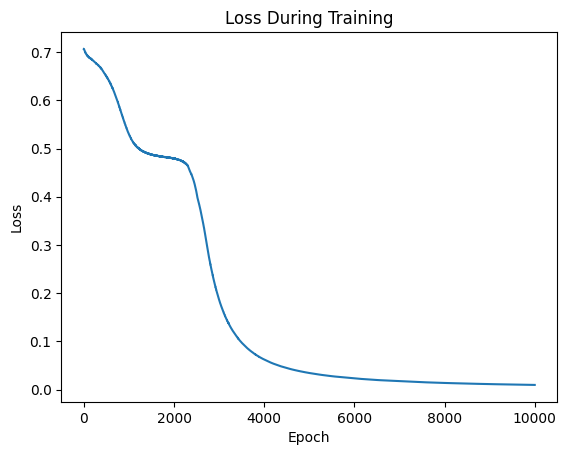

In [7]:
# Plotting the loss
plt.plot(range(epoch_num), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss During Training')
plt.show()

In [8]:
threshold = 0.5
predictions = xor_model(X) > threshold

print('***************Truth Table***************')
# Print the input-output pairs
for input, pred in zip(X, predictions):
    print(f'Logical values Input: {input.numpy()}, Output: {1 if pred.item() else 0}')

***************Truth Table***************
Logical values Input: [0. 0.], Output: 0
Logical values Input: [0. 1.], Output: 1
Logical values Input: [1. 0.], Output: 1
Logical values Input: [1. 1.], Output: 0


<>:18: SyntaxWarning: invalid escape sequence '\s'
<>:18: SyntaxWarning: invalid escape sequence '\s'
/var/folders/ld/4k0p91jn48d419nrnhlt15sc0000gn/T/ipykernel_20303/1743239659.py:18: SyntaxWarning: invalid escape sequence '\s'
  plt.ylabel('$\sigma(x)$')


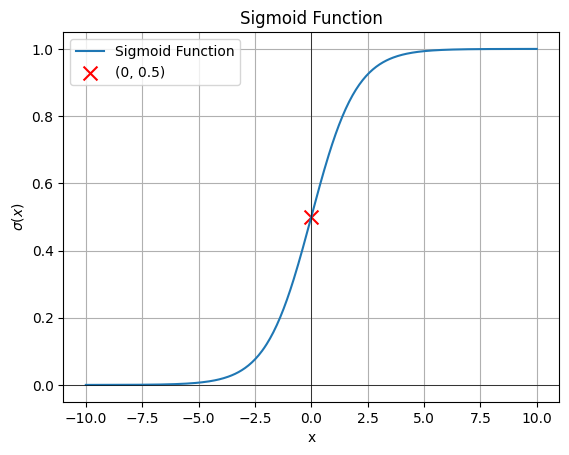

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Generate an array of x values
x = np.linspace(-10, 10, 400)

# Compute the corresponding y values using the sigmoid function
y = sigmoid(x)

# Create the plot
plt.plot(x, y, label='Sigmoid Function')
plt.title('Sigmoid Function')
plt.xlabel('x')
plt.ylabel('$\sigma(x)$')
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)

# Mark the point (0, 0.5) with a red cross
plt.scatter(0, 0.5, color='red', marker='x', s=100, label='(0, 0.5)')

# Add a legend
plt.legend()

# Show the plot
plt.show()


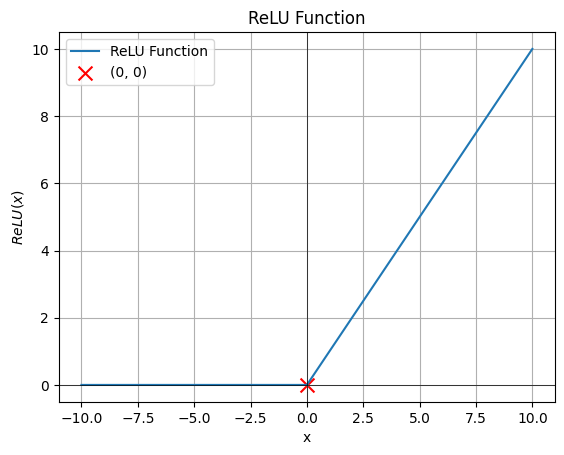

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# ReLU function
def relu(x):
    return np.maximum(0, x)

# Generate an array of x values
x = np.linspace(-10, 10, 400)

# Compute the corresponding y values using the ReLU function
y = relu(x)

# Create the plot
plt.plot(x, y, label='ReLU Function')
plt.title('ReLU Function')
plt.xlabel('x')
plt.ylabel('$ReLU(x)$')
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)

# Mark the point (0, 0) with a red cross
plt.scatter(0, 0, color='red', marker='x', s=100, label='(0, 0)')

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [10]:
# definicja funkcji XOR
def xor(x1, x2):
    return (x1 and not x2) or (not x1 and x2)

In [ ]:
y = xor_model(X)
make_dot(y.mean(), params=dict(xor_model.named_parameters()))

In [ ]:
make_dot(y.mean(), params=dict(xor_model.named_parameters()), show_attrs=True, show_saved=True)

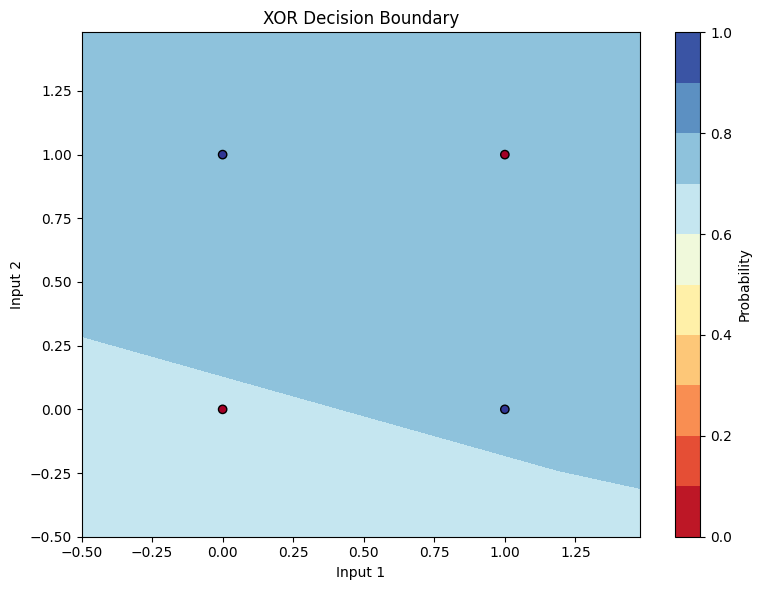

In [26]:
def plot_decision_boundary(model, X, y):
    # Set model to evaluation mode
    model.eval()
    
    # Create a mesh grid
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    
    # Get predictions for all points in the mesh
    with torch.no_grad():  # Disable gradient computation
        Z = model(torch.FloatTensor(np.c_[xx.ravel(), yy.ravel()]))
        Z = Z.detach().numpy().reshape(xx.shape)
    
    # Create the plot
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, levels=np.linspace(0, 1, 11), cmap=plt.cm.RdYlBu)
    plt.colorbar(label='Probability')
    
    # Plot the training points
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y.squeeze().detach().numpy(),
                         cmap=plt.cm.RdYlBu, edgecolors='black')  # Fixed parameter name here
    
    plt.xlabel('Input 1')
    plt.ylabel('Input 2')
    plt.title('XOR Decision Boundary')
    plt.tight_layout()
    plt.show()

# Now call the function with your model and data
plot_decision_boundary(xor_model, X, y)

In [20]:
# Visualize weights
def visualize_weights(model):
    plt.figure(figsize=(15, 5))
    
    # Plot W1 weights
    plt.subplot(131)
    plt.imshow(model.W1.weight.detach().numpy())
    plt.title('W1 Weights')
    plt.colorbar()
    
    # Plot W2 weights
    plt.subplot(132)
    plt.imshow(model.W2.weight.detach().numpy())
    plt.title('W2 Weights')
    plt.colorbar()
    
    # Plot W3 weights
    plt.subplot(133)
    plt.imshow(model.W3.weight.detach().numpy())
    plt.title('W3 Weights')
    plt.colorbar()
    
    plt.tight_layout()
    plt.show()

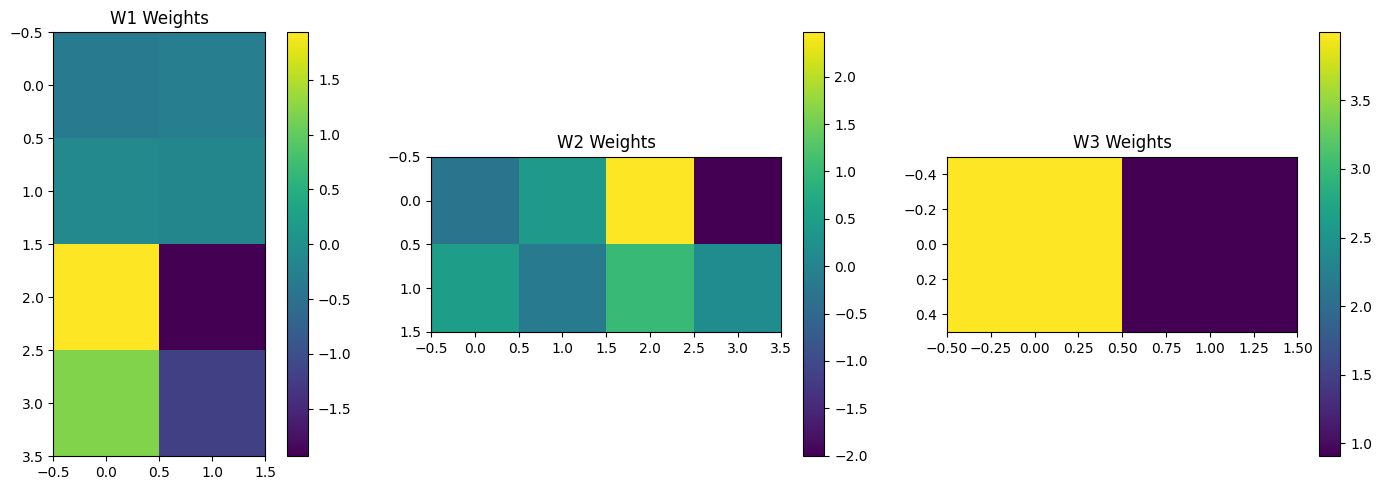

In [21]:
visualize_weights(xor_model)

In [ ]:
class FlexibleMLP(nn.Module):
    def __init__(self, layer_sizes, activation_fn=F.relu):
        super(FlexibleMLP, self).__init__()
        self.layers = nn.ModuleList()
        self.activation_fn = activation_fn
        
        for i in range(len(layer_sizes)-1):
            self.layers.append(nn.Linear(layer_sizes[i], layer_sizes[i+1]))
    
    def forward(self, x):
        for layer in self.layers[:-1]:
            x = self.activation_fn(layer(x))
        x = F.sigmoid(self.layers[-1](x))
        return x